In [ ]:
# ابوذر بختیاری برزیده
from sklearn.datasets import load_breast_cancer, make_classification,make_circles
from inspect import classify_class_attrs
import matplotlib.pyplot as plt

(1000, 2) (1000,)


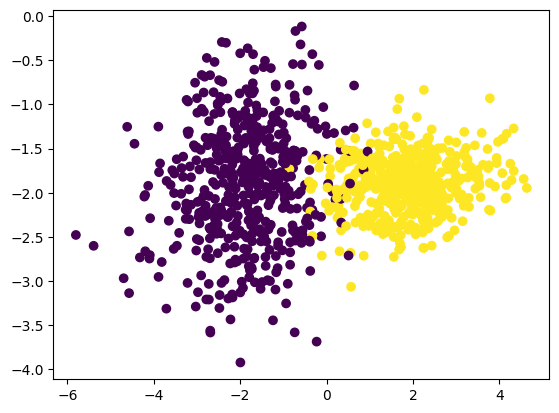

In [3]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=20, n_clusters_per_class=1, class_sep=1.9,n_classes=2)
print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,1], c=y)

(1000, 2) (1000,)


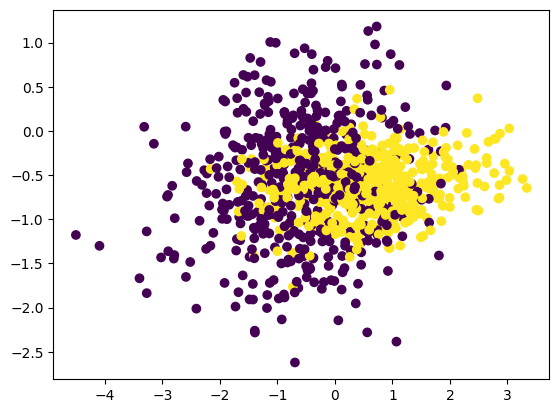

In [4]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=20, n_clusters_per_class=1, class_sep=0.6,n_classes=2)
print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score

In [6]:
X, y = load_breast_cancer(return_X_y = True)
X.shape , y.shape

((569, 30), (569,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [8]:
mdl = LogisticRegression()
mdl.fit(X_train,y_train)
pred_train = mdl.predict(X_train)
accuracy_score(y_train, pred_train)

h:\python\setup  file\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9582417582417583

In [9]:
mdl = LogisticRegression()
mdl.fit(X_train,y_train)
pred_test = mdl.predict(X_test)
accuracy_score(y_test, pred_test)

h:\python\setup  file\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9385964912280702

In [10]:
mdl1 = SGDClassifier(alpha = 0.0001, max_iter = 1000)
mdl1.fit(X_train, y_train)
pred1_train = mdl1.predict(X_train)
accuracy_score(y_train, pred1_train)

0.9032967032967033

In [11]:
mdl1 = SGDClassifier(alpha = 0.0001, max_iter = 1000)
mdl1.fit(X_train, y_train)
pred1_test = mdl1.predict(X_test)
accuracy_score(y_test, pred1_test)
     

0.8421052631578947

In [12]:
from sklearn.linear_model import Perceptron


In [13]:

mdl2 = Perceptron(alpha = 0.0001, max_iter = 1000)
mdl2.fit(X_train, y_train)
pred2_train = mdl2.predict(X_train)
accuracy_score(y_train, pred2_train)

0.9230769230769231

In [14]:
mdl2 = Perceptron(alpha = 0.0001, max_iter = 1000)
mdl2.fit(X_train, y_train)
pred2_test = mdl2.predict(X_test)
accuracy_score(y_test, pred2_test)

0.9035087719298246

Accuracy: 0.97
Confusion Matrix:
 [[141   7]
 [  2 150]]
Number of errors: 9


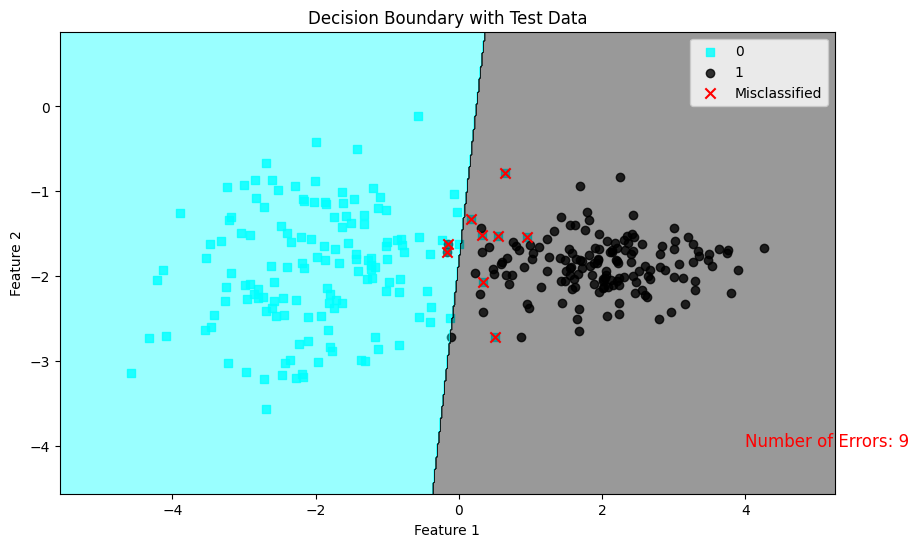

In [28]:
# ابوذر بختیاری برزیده

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# تولید داده‌ها
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=20, n_clusters_per_class=1, class_sep=1.9,n_classes=2)

# تقسیم  به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# آموزش مدل جدا کننده خطی
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# پیش‌بینی  داده‌های آزمایشی
y_pred = lr_model.predict(X_test)

# محاسبه دقت
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# محاسبه ماتریس بهم‌ریختگی
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# تعداد خطا
num_errors = np.sum(y_test != y_pred)
print("Number of errors:", num_errors)

# تابعی برای رسم خط جدا کننده نمایش خطاها
def plot_decision_boundary(X, y, classifier, errors, title):
    markers = ('s', 'o')
    colors = ('cyan', 'black')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # رسم نقاط 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl)

    # رسم خط جدا کننده خطی
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    # نمایش خطا
    misclassified = X[y != classifier.predict(X)]
    plt.scatter(misclassified[:, 0], misclassified[:, 1],
                c='red', marker='x', s=55, label='Misclassified')

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title(title)
    plt.legend()

# رسم خط جدا کننده  و نمایش خطا
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test, y_test, lr_model, num_errors, "Decision Boundary with Test Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.text(4, -4, f'Number of Errors: {num_errors}', fontsize=12, color='red')
plt.show()
